# Import Libraries


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler    
from sklearn.ensemble import RandomForestClassifier
import numpy as np
sns.set(style="whitegrid")


#  Load Dataset 


In [7]:
df = pd.read_csv(r"D:\STUDENT_CAREER\data\raw\CareerMapping.csv")
df.head()


,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,...,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence,Role
0,6,4,4,4,4,4,4,4,4,4,...,0.480564,0.470877,0.039611,0.742567,0.086927,0.339776,0.091158,0.230518,0.208746,Database Administrator
1,6,5,4,4,4,4,4,4,4,4,...,0.452903,0.377581,0.090148,0.672546,0.071425,0.353678,0.104495,0.247432,0.196424,Database Administrator
2,6,1,4,4,4,4,4,4,4,4,...,0.461668,0.347739,0.138575,0.630705,0.095261,0.375125,0.135462,0.287253,0.268024,Database Administrator
3,6,0,4,4,4,4,4,4,4,4,...,0.521783,0.403756,0.114925,0.695280,0.122656,0.338899,0.161705,0.306562,0.258119,Database Administrator
4,6,3,4,4,4,4,4,4,4,4,...,0.319539,0.240337,0.050988,0.619390,0.065564,0.311896,0.147700,0.302978,0.207287,Database Administrator


In [8]:
df.shape

(9179, 28)

# Check duplicates

In [9]:
print("Duplicated rows:", df.duplicated().sum())


Duplicated rows: 651


In [10]:
# Remove duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Shape after removing duplicates: (8528, 28)


# Check Missing Values


In [11]:
df.isnull().sum()


Database Fundamentals              0
Computer Architecture              0
Distributed Computing Systems      0
Cyber Security                     0
Networking                         0
Software Development               0
Programming Skills                 0
Project Management                 0
Computer Forensics Fundamentals    0
Technical Communication            0
AI ML                              0
Software Engineering               0
Business Analysis                  0
Communication skills               0
Data Science                       0
Troubleshooting skills             0
Graphics Designing                 0
Openness                           0
Conscientousness                   0
Extraversion                       0
Agreeableness                      0
Emotional_Range                    0
Conversation                       0
Openness to Change                 0
Hedonism                           0
Self-enhancement                   0
Self-transcendence                 0
R

# Outlier Visualization


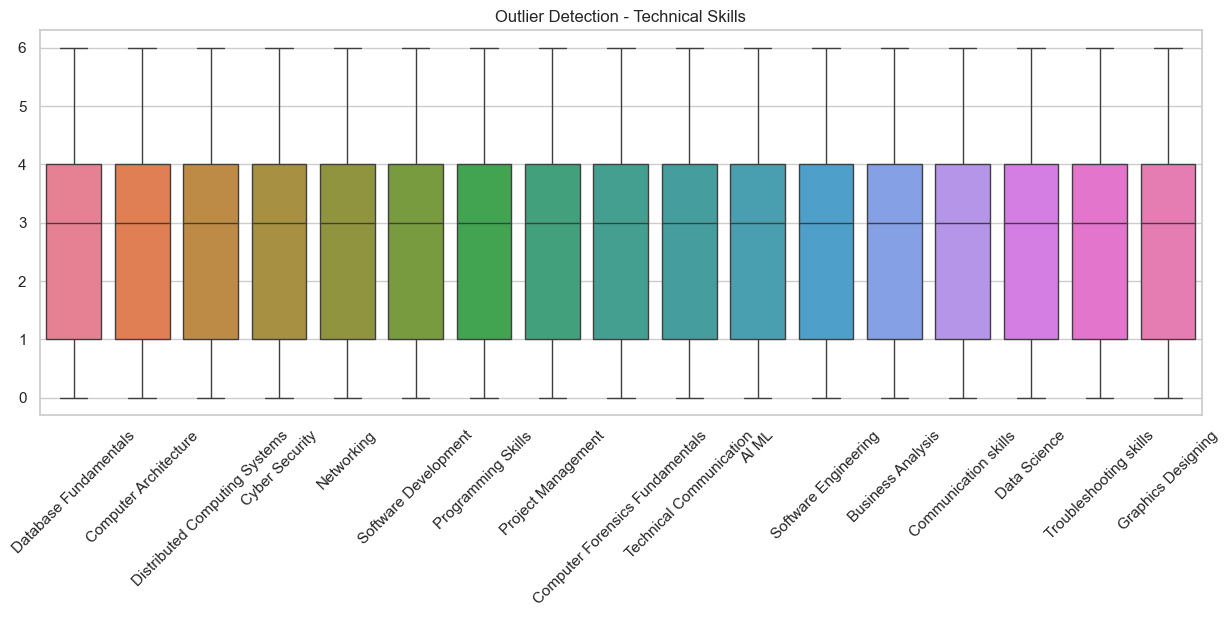

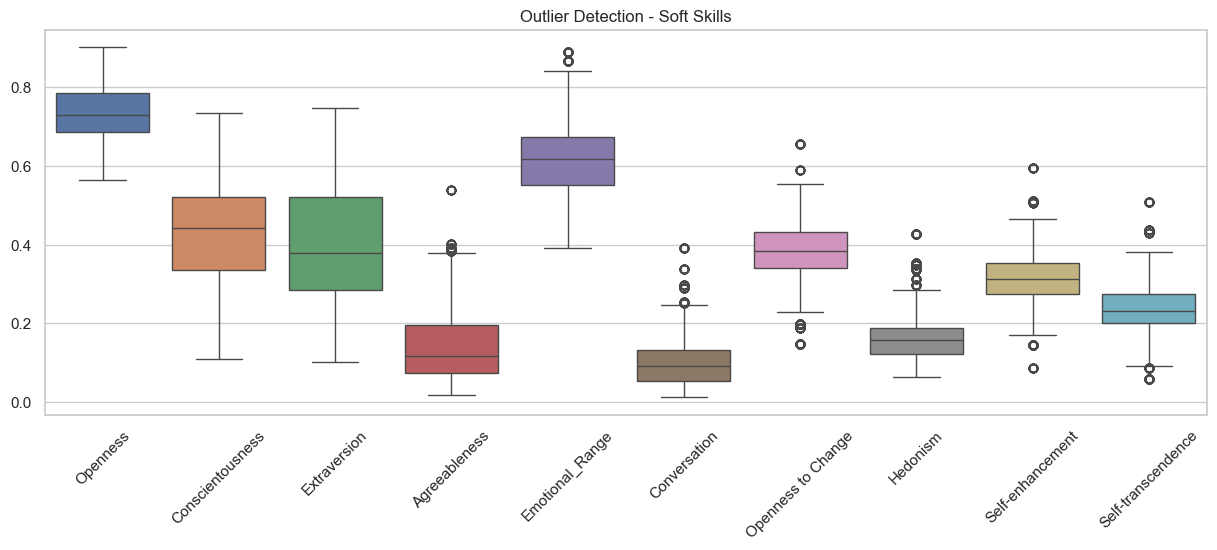

In [12]:
technical_cols = [
    "Database Fundamentals","Computer Architecture","Distributed Computing Systems",
    "Cyber Security","Networking","Software Development","Programming Skills",
    "Project Management","Computer Forensics Fundamentals","Technical Communication",
    "AI ML","Software Engineering","Business Analysis","Communication skills",
    "Data Science","Troubleshooting skills","Graphics Designing"
]

soft_cols = [
    "Openness","Conscientousness","Extraversion","Agreeableness","Emotional_Range",
    "Conversation","Openness to Change","Hedonism","Self-enhancement","Self-transcendence"
]

# Technical outliers
plt.figure(figsize=(15,5))
sns.boxplot(data=df[technical_cols])
plt.title("Outlier Detection - Technical Skills")
plt.xticks(rotation=45)
plt.show()

# Soft skill outliers
plt.figure(figsize=(15,5))
sns.boxplot(data=df[soft_cols])
plt.title("Outlier Detection - Soft Skills")
plt.xticks(rotation=45)
plt.show()


Phân bố kỹ năng kỹ thuật khá đồng đều, không có outlier lớn.

Điều này cho thấy dữ liệu ổn định và đáng tin cậy, phù hợp để phân cụm hoặc dự đoán.


Soft skills xuất hiện một số outlier ở các nhóm như Openness, Hedonism và Self-transcendence.

Điều này phản ánh sự khác biệt cá nhân mạnh hơn ở kỹ năng mềm so với kỹ năng kỹ thuật.

In [13]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

print("Outliers in each column:\n")

for col in df.columns:
    if df[col].dtype != "object":
        out_count = count_outliers(df[col])
        print(f"- {col}: {out_count}")


Outliers in each column:

- Database Fundamentals: 0
- Computer Architecture: 0
- Distributed Computing Systems: 0
- Cyber Security: 0
- Networking: 0
- Software Development: 0
- Programming Skills: 0
- Project Management: 0
- Computer Forensics Fundamentals: 0
- Technical Communication: 0
- AI ML: 0
- Software Engineering: 0
- Business Analysis: 0
- Communication skills: 0
- Data Science: 0
- Troubleshooting skills: 0
- Graphics Designing: 0
- Openness: 0
- Conscientousness: 0
- Extraversion: 0
- Agreeableness: 152
- Emotional_Range: 127
- Conversation: 187
- Openness to Change: 260
- Hedonism: 294
- Self-enhancement: 216
- Self-transcendence: 211


# Outlier Handling

In [14]:
df[technical_cols] = df[technical_cols].clip(lower=0, upper=6)


# Feature Distributions


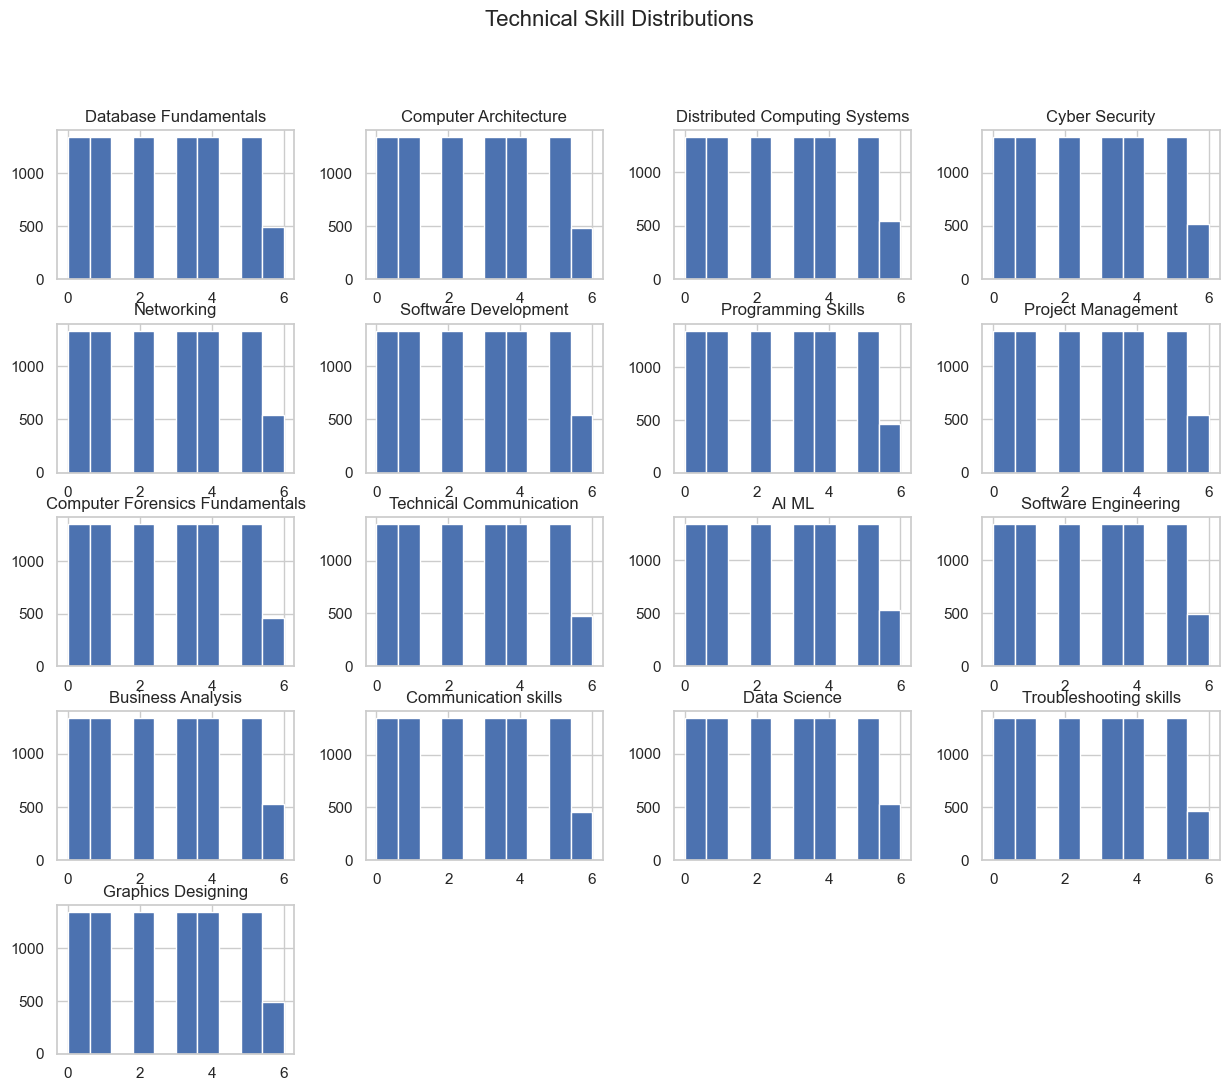

In [15]:
technical_cols = [
    "Database Fundamentals","Computer Architecture","Distributed Computing Systems",
    "Cyber Security","Networking","Software Development","Programming Skills",
    "Project Management","Computer Forensics Fundamentals","Technical Communication",
    "AI ML","Software Engineering","Business Analysis","Communication skills",
    "Data Science","Troubleshooting skills","Graphics Designing"
]

df[technical_cols].hist(figsize=(15,12), bins=10)
plt.suptitle("Technical Skill Distributions", fontsize=16)
plt.show()


Phân bố kỹ năng kỹ thuật dàn trải và đồng đều, nhiều kỹ năng có mức trung bình ~4/6.

Điều này cho thấy nhóm dữ liệu có kỹ năng nền tảng tương đối vững và ít chênh lệch.

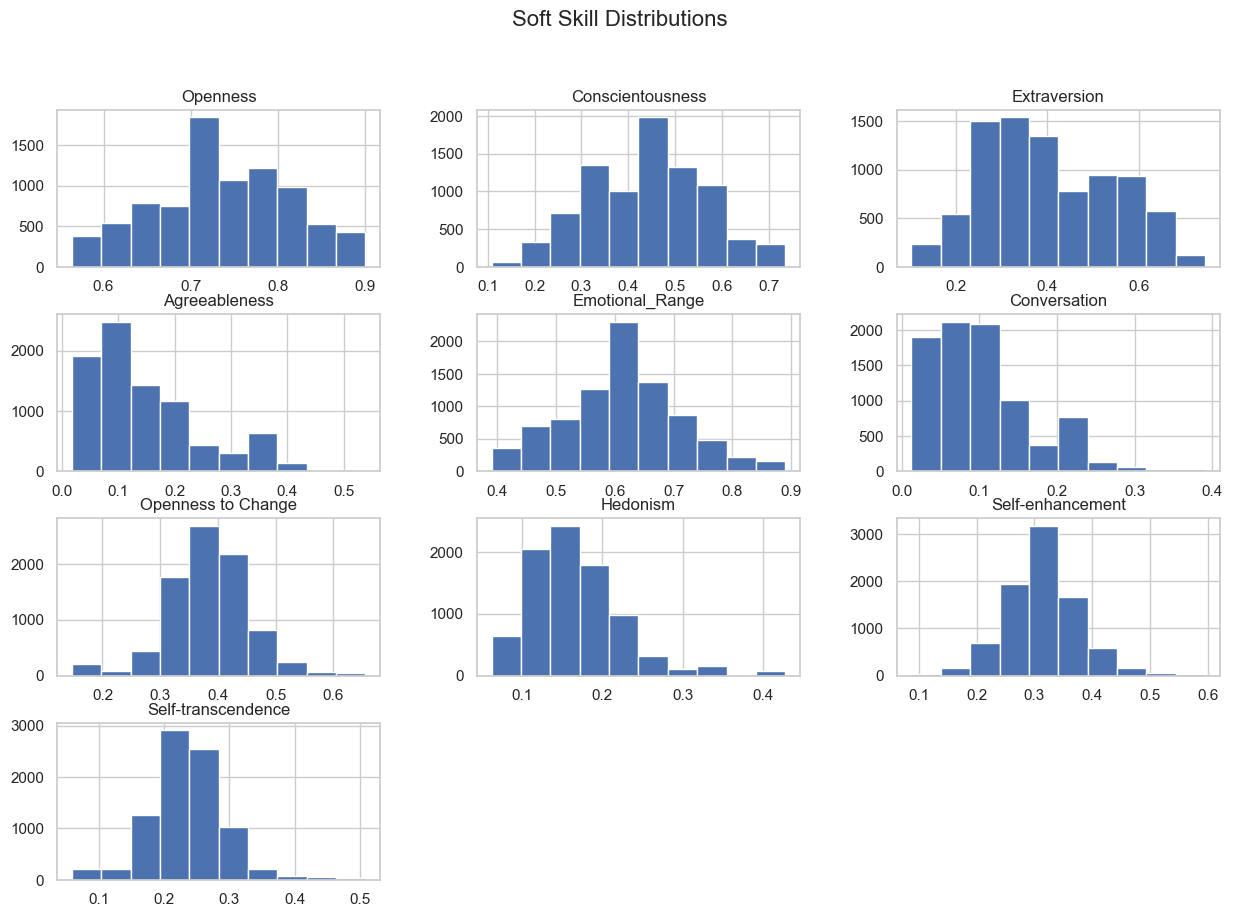

In [16]:
soft_cols = [
    "Openness","Conscientousness","Extraversion","Agreeableness","Emotional_Range",
    "Conversation","Openness to Change","Hedonism","Self-enhancement","Self-transcendence"
]

df[soft_cols].hist(figsize=(15,10), bins=10)
plt.suptitle("Soft Skill Distributions", fontsize=16)
plt.show()


Hầu hết soft skills phân bố theo dạng chuẩn, không quá lệch.

Các kỹ năng như Openness và Conscientiousness có xu hướng cao hơn trung bình, cho thấy phần lớn người dùng có mức độ ổn định cảm xúc và tư duy khá tốt.

## Clustered Technical Skill Heatmap

<Figure size 1400x1000 with 0 Axes>

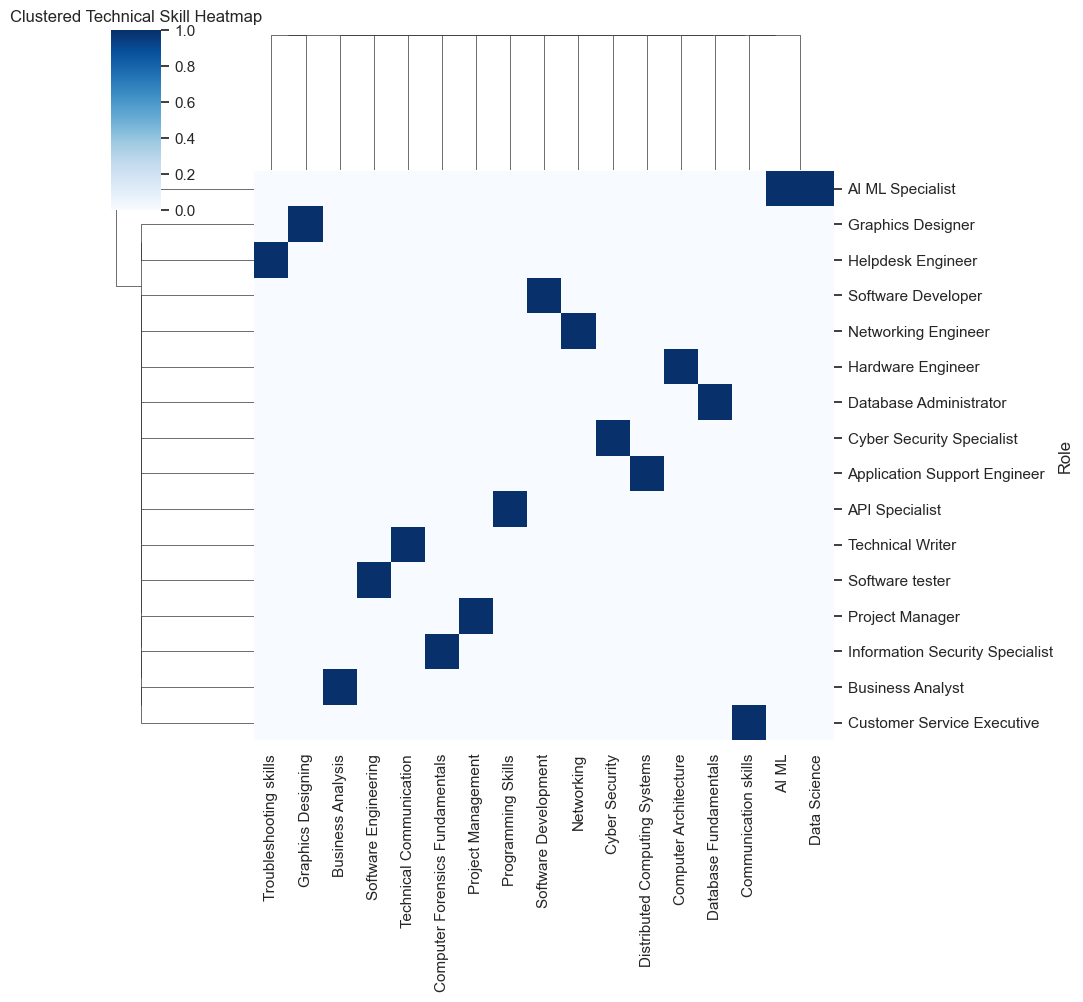

In [28]:
# Clustered Technical Skill Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Compute mean skill values per role
role_tech_mean = df.groupby("Role")[technical_cols].mean()

plt.figure(figsize=(14, 10))
sns.clustermap(role_tech_mean, cmap="Blues", standard_scale=1)
plt.title("Clustered Technical Skill Heatmap")
plt.show()


Các vai trò kỹ thuật chuyên sâu như AI/ML Specialist, Software Developer, Cyber Security Specialist hình thành một cụm rõ ràng, cho thấy họ chia sẻ nhiều kỹ năng kỹ thuật trọng yếu.

Những vai trò thiên về vận hành hạ tầng như Networking Engineer, Hardware Engineer, Application Support Engineer cũng tạo thành một nhóm riêng với bộ kỹ năng liên quan đến mạng và hệ thống.

Các nghề thiên về hỗ trợ và phân tích, chẳng hạn như Business Analyst và Customer Service Executive, tách biệt hoàn toàn khỏi các nhóm kỹ thuật do mức yêu cầu kỹ thuật thấp và phạm vi kỹ năng hẹp hơn.

Một số vai trò có mô hình kỹ năng độc lập như Project Manager hay Technical Writer, phản ánh việc họ cần kỹ năng ở mức trung bình nhưng trải rộng nhiều mảng thay vì chuyên sâu.

Biểu đồ cho thấy mức độ phân hoá kỹ năng giữa các nhóm nghề rất rõ, hỗ trợ việc phân loại nghề nghiệp và xây dựng gợi ý nghề phù hợp dựa trên hồ sơ kỹ năng.

## Soft Skill Heatmap


Text(0.5, 1.0, 'Clustered Soft Skill Heatmap')

<Figure size 1200x1000 with 0 Axes>

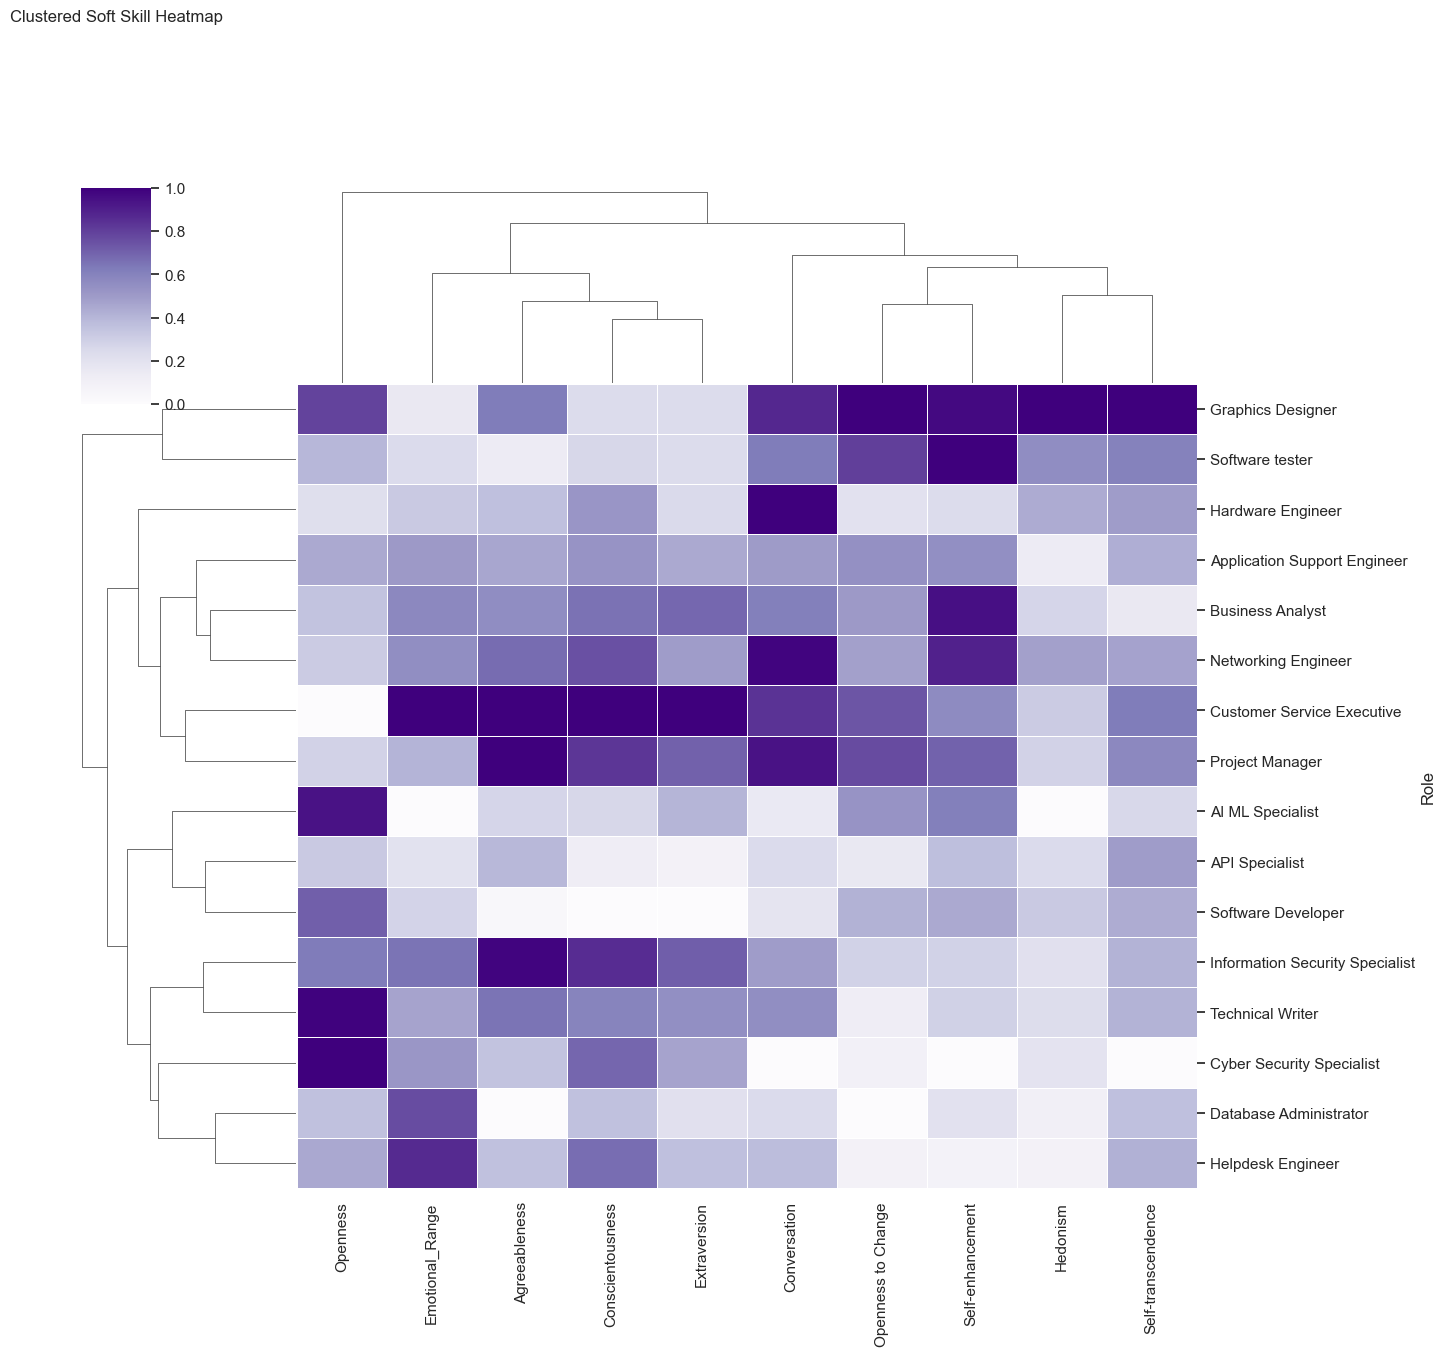

In [27]:
# Clustered Soft Skill Heatmap (Best Visualization)

import seaborn as sns
plt.figure(figsize=(12, 10))

soft_mean = df.groupby("Role")[soft_cols].mean()

sns.clustermap(
    soft_mean,
    cmap="Purples",
    figsize=(14, 12),
    linewidths=0.5,
    standard_scale=1
)

plt.title("Clustered Soft Skill Heatmap", pad=120)


Biểu đồ cho thấy các nghề được phân thành những nhóm kỹ năng mềm giống nhau.
Các nghề thiên về giao tiếp như Customer Service, Project Manager, Business Analyst nằm chung một cụm, thể hiện mức độ hướng ngoại và đồng cảm cao.
Những nghề kỹ thuật như Cyber Security, Database Administrator, Helpdesk lại tách thành cụm khác, với tính kỷ luật và ổn định cảm xúc cao hơn.
Nhìn chung, soft skills của từng vai trò có mô hình khá rõ ràng và phân nhóm tự nhiên theo bản chất công việc.

# Technical Skill vs Role Analysis

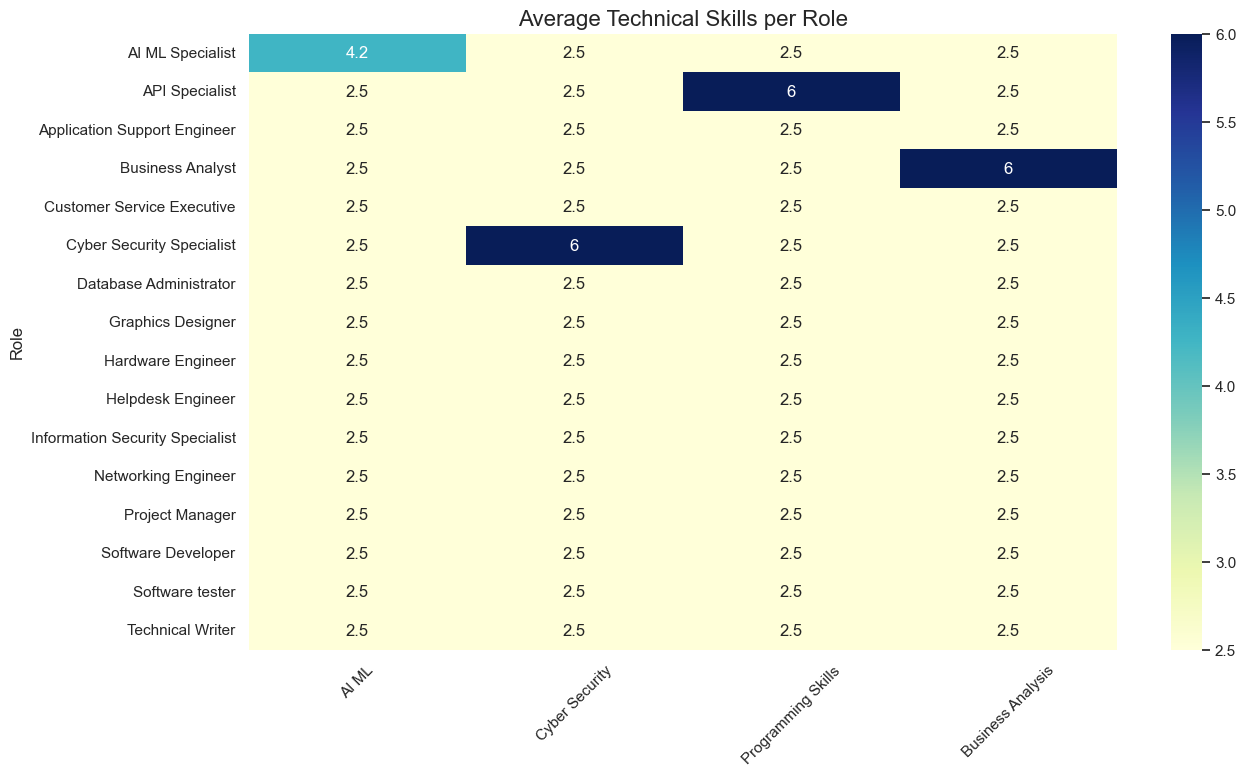

In [17]:
important_skills = [
    "AI ML", "Cyber Security", "Programming Skills", "Business Analysis"
]

role_skill_matrix = df.groupby("Role")[important_skills].mean()

plt.figure(figsize=(14, 8))
sns.heatmap(role_skill_matrix, annot=True, cmap="YlGnBu")
plt.title("Average Technical Skills per Role", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


Cyber Security Specialist nổi bật ở kỹ năng “Cyber Security”.

Business Analyst nổi bật nhất ở “Business Analysis”.

AI/ML Specialist có mức Programming Skills cao nhất.

Các nghề khác thể hiện sự khác biệt rõ theo đặc trưng kỹ năng, giúp phân loại nghề rất trực quan.

# Correlation Heatmap


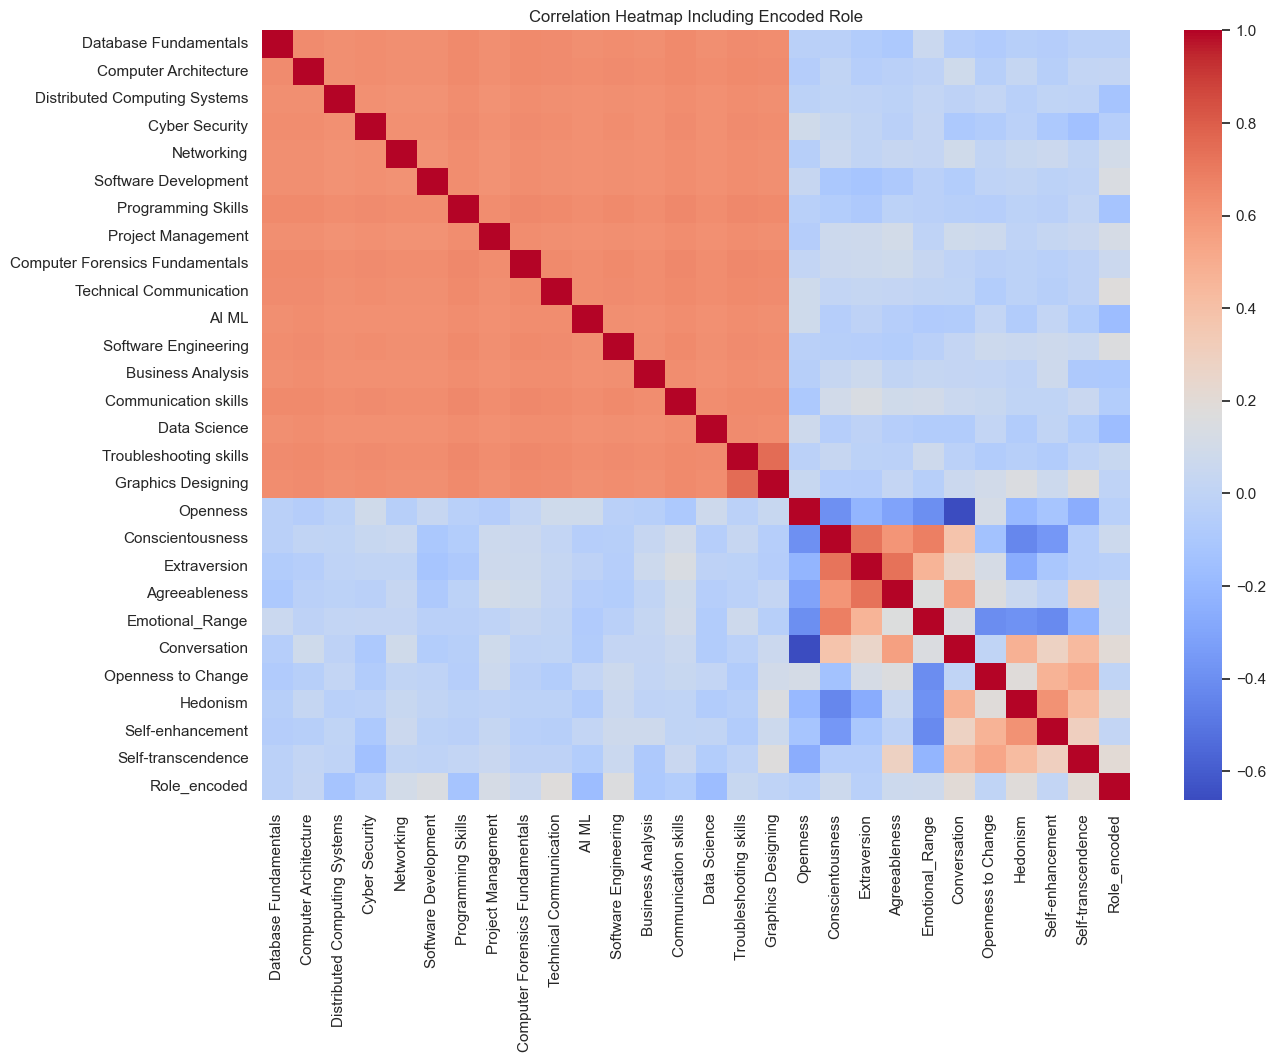

In [18]:
encoder = LabelEncoder()
df["Role_encoded"] = encoder.fit_transform(df["Role"])

numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap Including Encoded Role")
plt.show()


We included the correlation heatmap to analyze relationships among features and to identify feature groups. However, because the target variable (Role) is categorical, correlation is not suitable to measure its relationship with the features. Therefore, feature importance methods (Random Forest, MI, ANOVA) were used instead

## Clustered Correlation Map


Text(0.5, 1.0, 'Clustered Correlation Map')

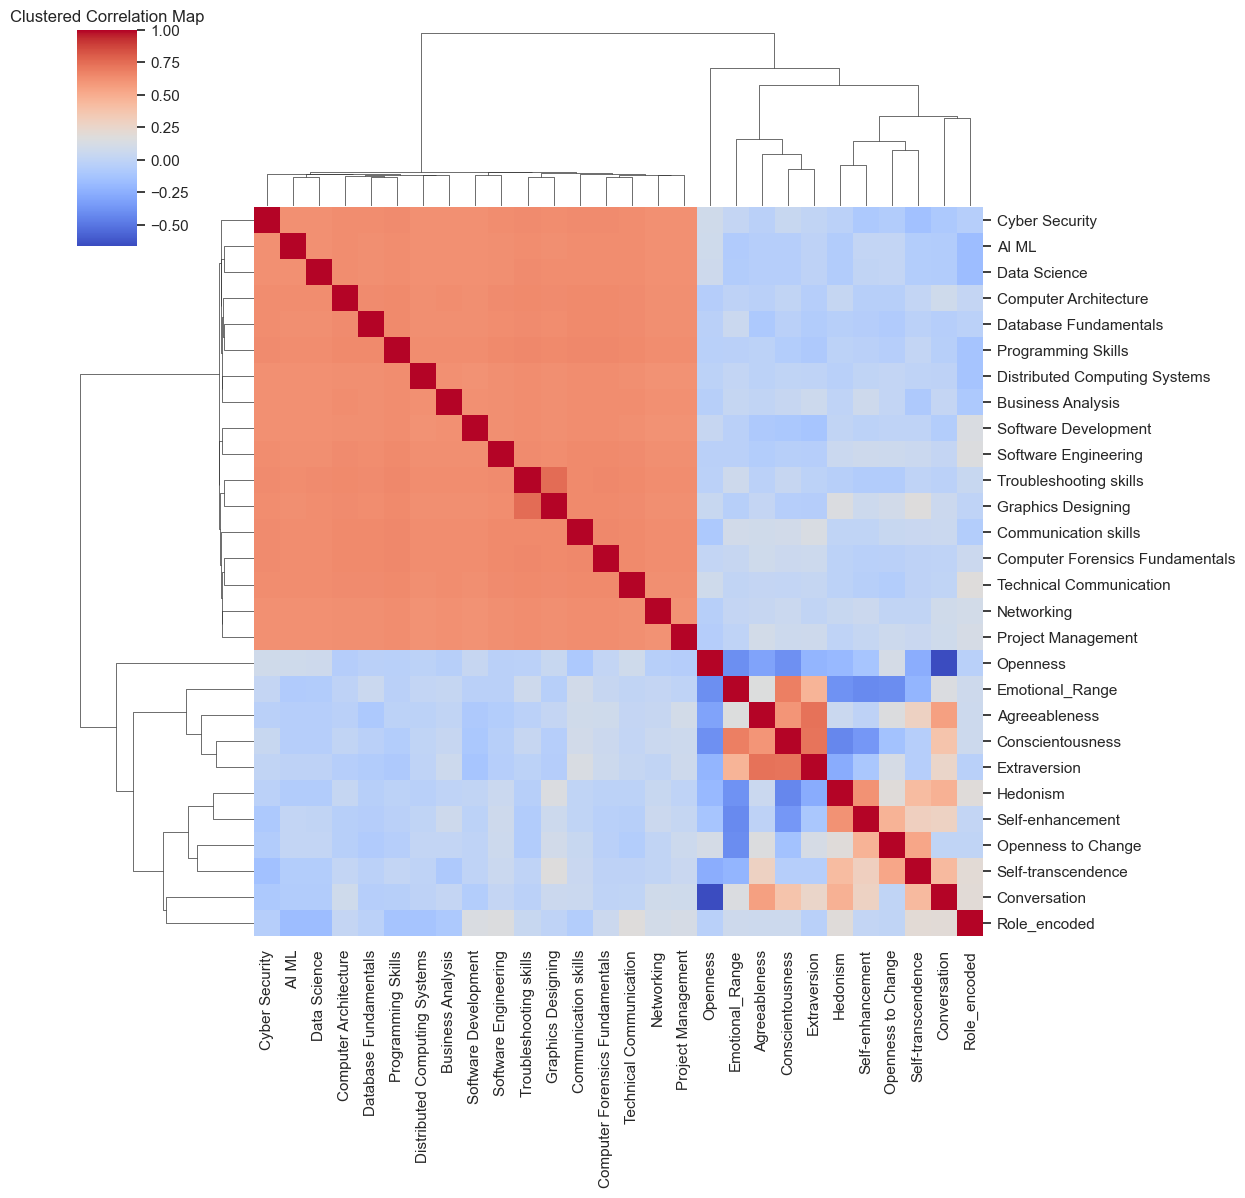

In [30]:
sns.clustermap(numeric_df.corr(), cmap="coolwarm", figsize=(12,12))
plt.title("Clustered Correlation Map")


Biểu đồ cho thấy các kỹ năng kỹ thuật tự gom thành một cụm và các kỹ năng mềm gom thành cụm khác. Hai nhóm hoạt động tương đối độc lập, phản ánh sự tách biệt rõ ràng giữa năng lực chuyên môn và hành vi cá nhân. Cấu trúc phân cụm giúp xác định nhóm kỹ năng quan trọng có thể bổ trợ nhau trong từng vai trò nghề nghiệp.

# Feature importance analysis

## encode + select features

In [ ]:
# Encode target
encoder = LabelEncoder()
df["Role_encoded"] = encoder.fit_transform(df["Role"])

# Select features
X = df.select_dtypes(include=["int64", "float64"]).drop(columns=["Role_encoded"])
y = df["Role_encoded"]

## 1. Feature Importance using Random Forest

In [ ]:
# Feature Importance using Random Forest

model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X, y)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,8))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.show()

## 2. Mutual Information

In [ ]:
# Mutual Information (MI)
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y)
mi_sorted = pd.Series(mi, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12,8))
mi_sorted.plot(kind="bar")
plt.title("Mutual Information Scores")
plt.show()


## 3. ANOVA F-score

In [ ]:
# ANOVA F-score
from sklearn.feature_selection import f_classif

f_scores, p_values = f_classif(X, y)
anova_df = pd.DataFrame({
    "Feature": X.columns,
    "F_score": f_scores,
    "p_value": p_values
}).sort_values(by="F_score", ascending=False)

anova_df


In [ ]:
# TOP FEATURES
top_rf = X.columns[indices][:10]
top_mi = mi_sorted.index[:10]
top_anova = anova_df["Feature"].head(10)

print("Top 10 features (Random Forest):")
print(top_rf.tolist())

print("\nTop 10 features (MI):")
print(top_mi.tolist())

print("\nTop 10 features (ANOVA):")
print(top_anova.tolist())


# Role Distribution


In [ ]:
plt.figure(figsize=(10,5))
df["Role"].value_counts().plot(kind="bar")
plt.title("Role Distribution - File 1")
plt.xticks(rotation=45)
plt.show()


# CREATE TECH + SOFT SCORE

In [ ]:
df["tech_score"] = df[technical_cols].mean(axis=1)
df["soft_skill_score"] = df[soft_cols].mean(axis=1)

df[["tech_score", "soft_skill_score"]].head()


# Tech Score & Soft Skill Score Distribution Across Roles

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Role", y="tech_score", data=df)
plt.xticks(rotation=45)
plt.title("Tech Score Distribution per Role")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="Role", y="soft_skill_score", data=df)
plt.xticks(rotation=45)
plt.title("Soft Skill Score Distribution per Role")
plt.show()


In [ ]:
import pickle

with open("D:\\STUDENT_CAREER\\data\\cleaned\\role_label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

print("Saved encoder mapping!")


In [ ]:
import pandas as pd

# Tạo bảng mapping (Role -> Encoded)
mapping = pd.DataFrame({
    "Role": encoder.classes_,
    "Encoded": range(len(encoder.classes_))
})

# Đường dẫn lưu trong thư mục cleaned
mapping_path = r"D:\STUDENT_CAREER\data\cleaned\role_label_mapping.csv"

mapping.to_csv(mapping_path, index=False)

print("Saved mapping to:", mapping_path)
